# 결정 트리(Decision Tree))

- tree를 만들기 위해 예/아니오 질문을 반복하며 학습한다.
- 분류와 회귀에 모두 사용 가능
- 회귀는 마지막 잎사귀에 분류되어진 것들의 평균을 구하면 됨  
- 상관관계가 매우 높아 보이는 특성은 마지막 leap 분류에 사용하는 것이 좋을 수 있다(?)
- 지니 불순도 : 순도가 높으면 하나의 클래스만 / 순도가 낮으면 여러 클래서가 섞여 있음 
- 불순도가 높은 경우 -> 과대적합 문제
- 너무 많은 조건으로 쪼개면 복잡도가 높아지고 과대적합 
- 너무 적은 조건으로 쪼개면 과소적합
- 새로운 데이터 포인트가 들어오면 해당하는 노드를 찾아 분류라면 더 많은 클래스를 선택하고 회귀라면 평균을 구함
- 의사결정 트리의 장점은 분산이 커도 상관이 없다는 것 (조건문으로 그냥 거르면 됨)
- 과대적합을 해결하기 위해서 가지치기 한다 pruning
- 사이킥 런에서는 사전 가지치기는 지원하는데 사후 가지치기는 지원하지 않는다
- 가지치기한다고해서 자른 가지를 버리지 않고 위로 올려준다.
- 트리의 최대 깊이나 리프 노드의 최대 개수를 제어 (max_depth, max_eaf_nodes)
- 노드가 분할 하기 위한 데이터 포인트의 최소 개수를 지정 (min_sample_split)
- 조건이 충돌되니까 위 방법들 중 한 가지만 사용한다

# 데이터 전처리

## 인코딩과 원핫인코딩
- 인코딩(encoding) : 범주형 데이터를 수치형 데이터로 변환하는 것 (계산하기 위해)
 - 인코딩 방법
   - label encoding : 범주형을 정수로 변환하는 것
     - 순서가 존재하는 범주형 데이터 인코딩 할 때 사용
     - 단점: 크기특성이 없는 데이터에 크기를 갖는 숫자를 부여하게 됨
   - one hot encoding : 범주형을 이진수로 변환 
     - 순서가 있는 범주형 데이터 인코딩 할 때 사용
     - 인코딩: 범주형 데이터를 수치 데이터로 인코딩 해버리면 대소라는 수치 의미가 생기는 단점이 존재
     - 그 단점을 극복하는 것이 one-hot Encoding
     - 장점: 데이터에 크기가 없는 숫자를 부여할 수 있음
     - 특성을 늘려주는 효과
     
    - one hot encoding 방법
      - 과목 : 국어, 수학, 과학 -> 과학(001) 국어(100), 수학(010) 
        - 적은 순서대로 값 부여 후 df출력할때 칼럼만 오름차순 정렬 df는 이진수 할당 값이 아니라 그냥 특성을 0과 1로 보여주는 것 
        
      - 각 비트에 해당하는 새로운 컬럼을 생성 (이진수 아닌듯)
      - 새로운 컬럼의 순서는 클래스 값을 오름차순 정렬을 한 후에 순서대로 생성
      - 해당 클래스인 경우에만 1이고 그렇지 않으면 0을 할당
      
      - pandas에서 one-hot-encoding을 위한 함수 제공 : get_dummies()
         - 원핫인코딩에 해당하는 컬럼을 생성하고 기존 컬럼은 삭제
         
      - 원핫 인코딩의 장점
         - 새로운 특성을 늘려주는 효과 : 과소적합이 감소
         - 크기를 갖지않는 범주형 데이터를 크기를 갖지 않는 수치형으로 변환

In [19]:
import pandas as pd
data = pd.DataFrame({"산이름": ["국어", "수학", "과학"]})
data

,산이름
0,국어
1,수학
2,과학


In [20]:
one_hot = pd.get_dummies(data["산이름"])
one_hot
#특성을 늘리는 효과

,과학,국어,수학
0,0,1,0
1,0,0,1
2,1,0,0


## 교차검증
- 훈련데이터와 테스트 데이터 셋을 여러개로 만들어 훈련시킨 후 정확도를 평균내는 방법
- 정확도가 너무 높게 나와서 실제 점수에 가깝게 만들기 위해서 평균을 내는 것

In [ ]:
from sklearn.model_selection import cross_val_score   #교차검증 정확도 구하는 법
import numpy as np

# cv=5 : 데이터셋의 갯수
score = cross_val_score(model_dt, X_test, y_test, cv=5)
print("교차검증점수 :", score)
print("최종점수계산 :", np.mean(score))

## 정규화
- 편향된 데이터를 정규분포로 만드는 작업
- 모델의 성능을 향상

In [28]:
data = pd.read_csv("./data/data_skew.csv")

data.head()

,0,1,2,y
0,56,18,27,2.926144
1,81,57,3,4.744364
2,25,9,11,1.439488
3,20,13,30,0.569621
4,27,13,13,1.230924


In [29]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [30]:
X_train.iloc[:, 1].skew() #스큐가 왼쪽으로 치우친 데이터 셋

53.30571706922813

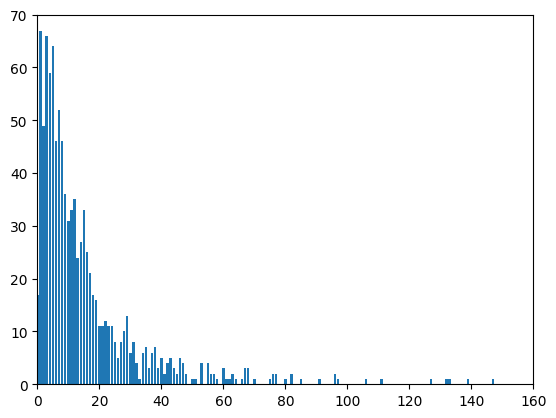

In [32]:
import numpy as np
import matplotlib.pyplot as plt

plt.xlim(0,160)
plt.ylim(0,70)

# x데이터의 1번 인덱스의 값들의 개수를 저장
bins = np.bincount(X.iloc[:,1])
#  x : 값들의 종류를 표시, y축 : 값 (개수) 
plt.bar(range(len(bins)), bins)
plt.show()

#왼쪽으로 치우친 분포 : 포화선 분포

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=555)

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

pred_train = knn_model.predict(X_train)
pred_test = knn_model.predict(X_test)

print("훈련오차 :", mean_squared_error(pred_train, y_train))
print("테스트 오차 :", mean_squared_error(pred_test, y_test))
#편향된 데이터 결과

훈련오차 : 0.30630091472970655
테스트 오차 : 0.5696582650296165


In [35]:
#정규분포로 만들기
#왼쪽으로 편향되어 있으면 log를 사용
#오른쪽으로 편향되어 있으면 exp() 지수함수를 사용
X_train2 = np.log(X_train+1)
X_test2 = np.log(X_test+1)

# +1을 하는 이유 0에 가까워지면 무한대가 되어서 계산이 안되기 때문에 0으로 만들지 않기 위해 1을 넣음
# y_train이 굉장히 작은 값이면 1이아니라 0.0001 등 더 작은 값을 더해서 무튼 0을 안만들게하면됨

# 1을 더하는 이유 : 0이 되면 log가 무한대(inf)가 되기 때문에 이를 방지하기 위한 것

In [36]:
X_train2.iloc[:, 0].skew()  #0에 가까워진 형태로 바뀜

-0.10017324773414837

(array([18.,  0.,  0., 28.,  0., 52.,  0., 32., 54., 81., 41., 52., 82.,
        34., 73., 58., 40., 31., 14., 23., 13., 11.,  6.,  4.,  3.]),
 array([0.        , 0.1979504 , 0.39590079, 0.59385119, 0.79180158,
        0.98975198, 1.18770237, 1.38565277, 1.58360316, 1.78155356,
        1.97950396, 2.17745435, 2.37540475, 2.57335514, 2.77130554,
        2.96925593, 3.16720633, 3.36515673, 3.56310712, 3.76105752,
        3.95900791, 4.15695831, 4.3549087 , 4.5528591 , 4.75080949,
        4.94875989]),
 <BarContainer object of 25 artists>)

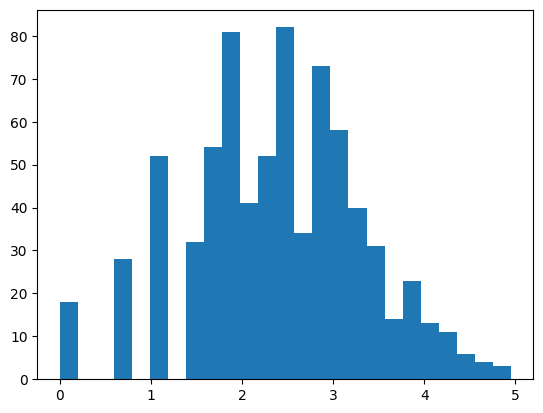

In [37]:
plt.hist(X_train2.iloc[:, 0],bins=25)

In [38]:
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

pred_train = knn_model.predict(X_train2)
pred_test = knn_model.predict(X_test2)

print("훈련오차 :", mean_squared_error(pred_train, y_train))
print("테스트 오차 :", mean_squared_error(pred_test, y_test))
#정규분포로 만들고 하니까 오차가 줄어든다.
#KNN등 거리기반에서는 정규화하고 계산하는 것이 필수다

훈련오차 : 6.739755108246763
테스트 오차 : 6.631739464495578


# (실습1) DecisionTree로 버섯 예측 - 분류

## 1. 문제정의
- 버섯의 특성 데이터를 이용해서 독버섯인지 식용버섯인지 분류하는 모델을 만들자
- 의사결정트리를 시각화
- 라벨인코딩, 원핫인코딩

## 2. 데이터 수집

In [41]:
import pandas as pd
mushroom = pd.read_csv('./data/mushroom.csv', encoding='euc-kr')
mushroom.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## 3. 탐색적 데이터 분석

In [42]:
#데이터의 형태
mushroom.shape

(8124, 23)

In [43]:
#결측치 확인 (결측치를 보여주지만 데이터 타입도 볼 수 있음)
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [44]:
#특성데이터와 라벨데이터 분리
X = mushroom.iloc[:, 1:]
y = mushroom["poisonous"]

X.shape, y.shape

((8124, 22), (8124,))

In [45]:
#라벨데이터의 클래스 확인
y.unique()

array(['p', 'e'], dtype=object)

In [46]:
#라벨데이터의 클래스의 데이터 수 확인
y.value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

#### 데이터 시각화

<AxesSubplot: xlabel='cap-shape', ylabel='count'>

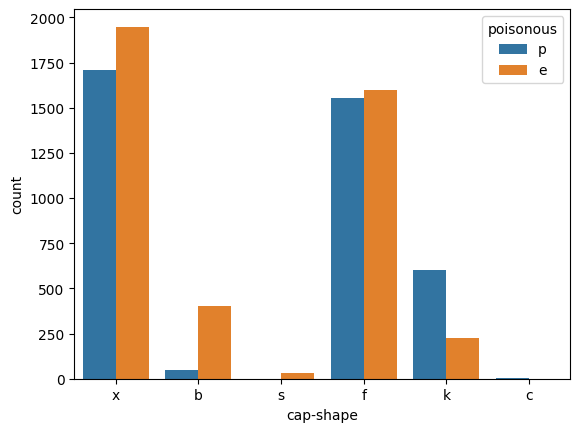

In [47]:
#시각화 도구 countplot()
import seaborn as sb

#범주형 데이터에서 클래스의 갯수를 표현하는 경우에 주로 사용
#X : x축값
#hue 는 새로운 변수를 다른 색상을 이용하여 추가하는 파라미터?
#col은 별도의 새로운 plot으로 분할하는 데 사용되는 파라미터?
sb.countplot(data=mushroom, x="cap-shape", hue=y)

#범주형 데이터를 통합하려면 시각화를 해서 많은 쪽에 통합하는 것이 좋다(?)

#### mushroom 데이터 원핫인코딩

In [21]:
# mushroom  데이터를 원핫인코딩
X2 = X.copy()
one_hot_X = pd.get_dummies(X2)
one_hot_X

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [22]:
# 훈련데이터와 테스트데이터로 분리
from sklearn.model_selection import train_test_split

#test_size=0.3 : 테스트 데이터 비율을 30% 로 설정
X_train, X_test, y_train, y_test = train_test_split(one_hot_X, y,
                                                    random_state=999, #어떤 랜덤 셋이 가장 효율이 좋은지 찾는 것도 중요
                                                    test_size=0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5686, 117), (2438, 117), (5686,), (2438,))

## 4. 모델 학습

In [23]:
from sklearn.tree import DecisionTreeClassifier 

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
print("훈련정확도 :", model_dt.score(X_train, y_train))
print("테스트정확도 :", model_dt.score(X_test, y_test))

훈련정확도 : 1.0
테스트정확도 : 1.0


# 트리 시각화하기

In [25]:
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.4 MB/s eta 0:00:00


- 윈도우용 graphviz 패키지 설치
    - https://www2.graphviz.org/Packages/development/windows/10/cmake/Release/x64/

In [45]:
#path 설정

import os

os.environ["PATH"] += os.pathsep +"C:/Program Files/Graphviz/bin"

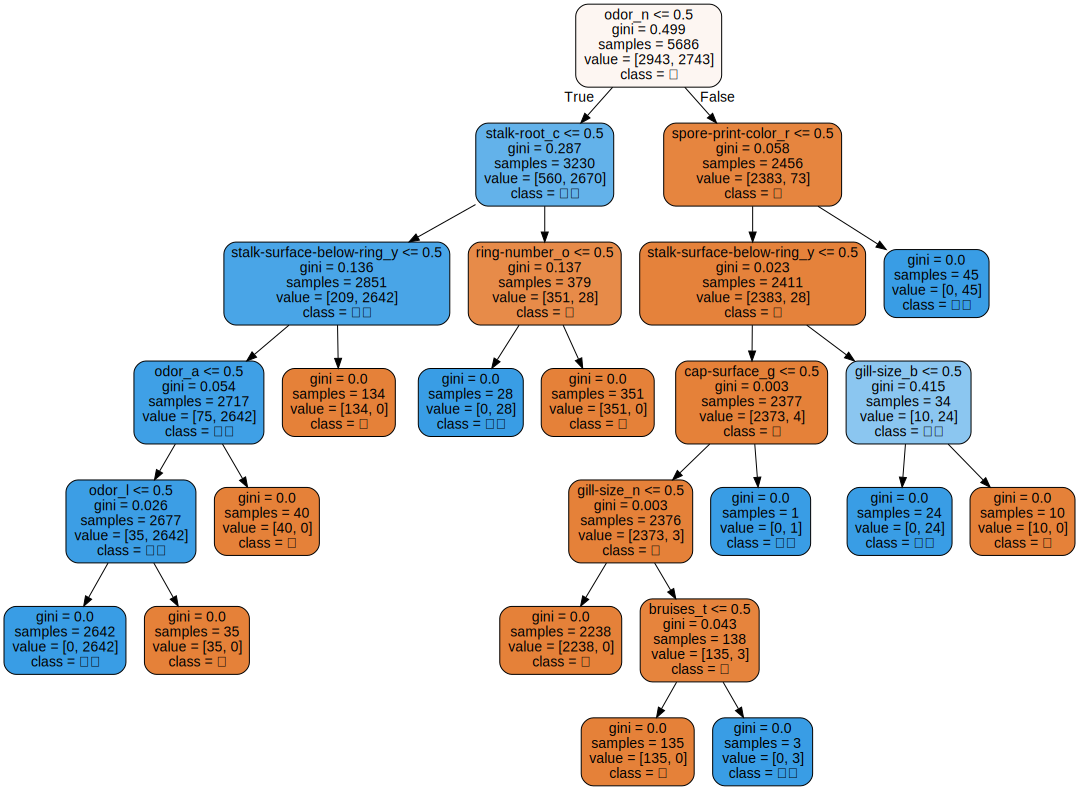

In [49]:
#만든 트리정보를 저장
from sklearn.tree import export_graphviz

#(사용할 모델, 저장할 파일명, 클래스명, 특성이름(컬럼명), 
#impurity(불순도 저장여부), filled(색칠여부), rounded(둥근사각형사용여부)
export_graphviz(model_dt, out_file="tree.dot", 
                class_names=["독", "식용"], #클래스 네임은 라벨명
                feature_names=one_hot_X.columns,
                impurity=True,
                filled=True,
                rounded=True)

import graphviz
#with  : 파일을 열었으면 반드시 닫아줘야 하는데 이것을 자동으로 해줌
#open() : 파일을 읽거나 쓰기 위해서 여는 것
#encoding="UTF-8" : 한글 인코딩
with open("tree.dot", encoding="UTF8") as f :
    #파일 읽기
    dot_graph = f.read()

#그래프출력
display(graphviz.Source(dot_graph))

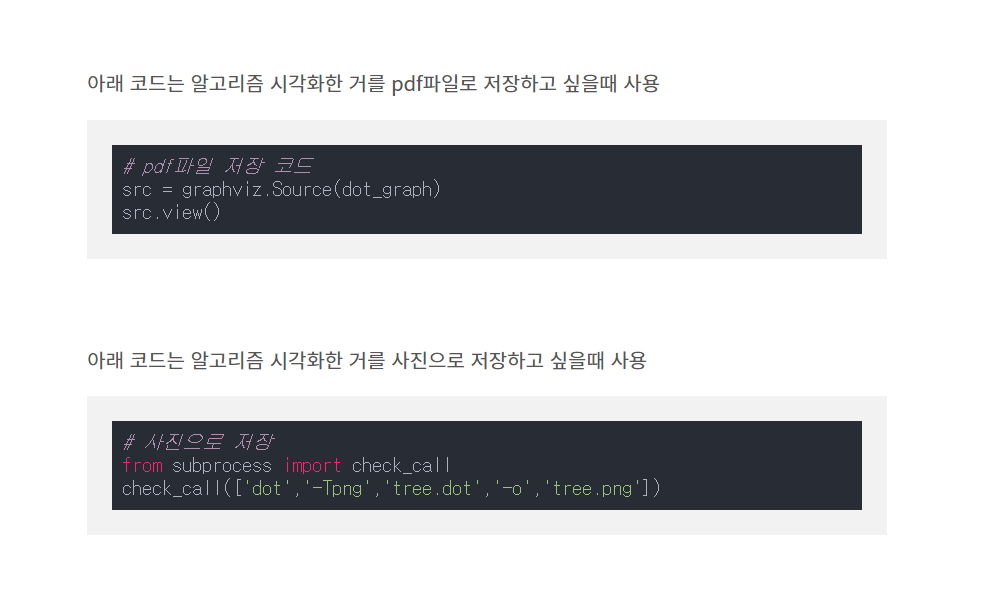

# 사전 가지치기 (pre_prunning)
- 트리의 복잡도를 감소시켜서 과대적합을 줄여주는 방법
- 종류
    - max_depth : 트리의 층을 제한
    - max_leaf_nodes : leaf node의 수를 제한
    - min_samples_split : 노드를 분리하는 최소 데이터 sample 수를 설정

## max_depth를 이용한 사전 가지치기

In [55]:
model_dt2 = DecisionTreeClassifier(max_depth=4)
model_dt2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [56]:
print("훈련정확도 :", model_dt2.score(X_train, y_train))
print("테스트정확도 :", model_dt2.score(X_test, y_test))
#과소 적합

훈련정확도 : 0.9933169187478016
테스트정확도 : 0.9942575881870386


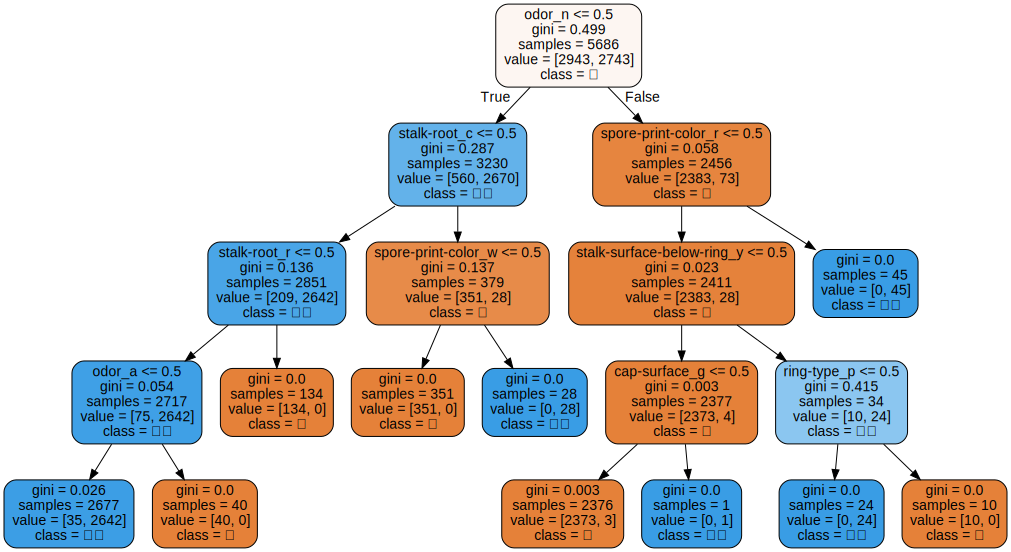

In [57]:
export_graphviz(model_dt2, out_file="tree.dot", 
                class_names=["독", "식용"],
                feature_names=one_hot_X.columns,
                impurity=True,
                filled=True,
                rounded=True)

with open("tree.dot", encoding="UTF8") as f :
    dot_graph = f.read()


display(graphviz.Source(dot_graph))

## max_leaf_nodes를 이용한 사전 가지치기

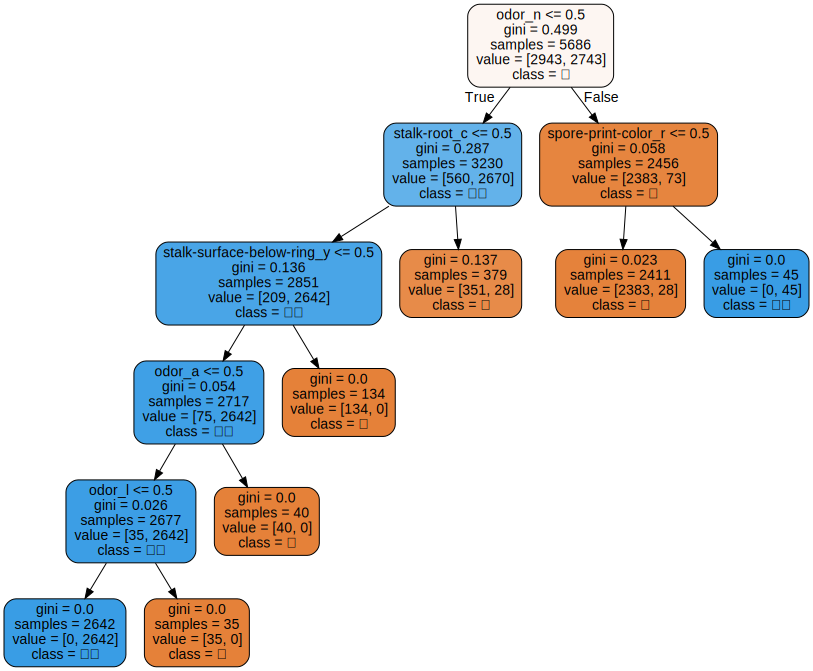

훈련정확도 : 0.9901512486809708
테스트정확도 : 0.9885151763740772


In [60]:
model_dt3 = DecisionTreeClassifier(max_leaf_nodes=7)
model_dt3.fit(X_train, y_train)

export_graphviz(model_dt3, out_file="tree.dot", 
                class_names=["독", "식용"],
                feature_names=one_hot_X.columns,
                impurity=True,
                filled=True,
                rounded=True)

with open("tree.dot", encoding="UTF8") as f :
    dot_graph = f.read()


display(graphviz.Source(dot_graph))

print("훈련정확도 :", model_dt3.score(X_train, y_train))
print("테스트정확도 :", model_dt3.score(X_test, y_test))

## min_samples_split를 이용한 사전 가지치기

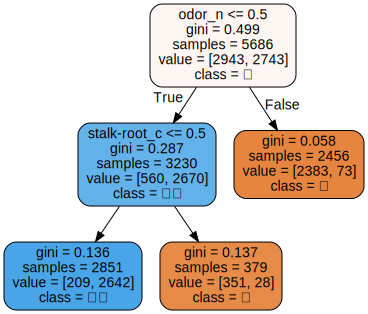

훈련정확도 : 0.9454801266268027
테스트정확도 : 0.9450369155045119


In [83]:
model_dt4 = DecisionTreeClassifier(min_samples_split=3000)
model_dt4.fit(X_train, y_train)

export_graphviz(model_dt4, out_file="tree.dot", 
                class_names=["독", "식용"],
                feature_names=one_hot_X.columns,
                impurity=True,
                filled=True,
                rounded=True)

with open("tree.dot", encoding="UTF8") as f :
    dot_graph = f.read()


display(graphviz.Source(dot_graph))

print("훈련정확도 :", model_dt4.score(X_train, y_train))
print("테스트정확도 :", model_dt4.score(X_test, y_test))